# Graph Learning
## Lab 4: Hierarchical Clustering

In this lab, you will learn to analyse the hierarchical structure of a graph.

## Import

In [125]:
from IPython.display import SVG

In [126]:
import numpy as np
from scipy import sparse

In [127]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainIteration, Paris, cut_straight
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph, visualize_dendrogram

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)

In [128]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')


Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), a small graph with ground-truth clusters.

In [129]:
dataset = karate_club(True)

In [130]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

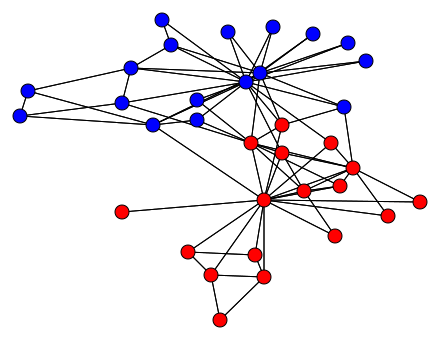

In [131]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm (divisive algorithm, top-down).
* Display the dendrogram.
* How many clusters are there at depth 1?
* Display the graph with the corresponding clustering.
* How many clusters are there at depth 2?

In [132]:
louvain = LouvainIteration()

In [133]:
dendrogram = louvain.fit_predict(adjacency)

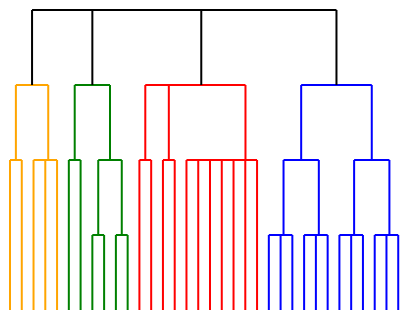

In [134]:
image = visualize_dendrogram(dendrogram)
SVG(image)

In [135]:
# find a clustering with n_clusters (at least n_clusters, if there is no cut with n_clusters)
labels = cut_straight(dendrogram, n_clusters=2)

In [136]:
print("Number of clusters at depth 1:", len(set(labels)))

Number of clusters at depth 1: 4


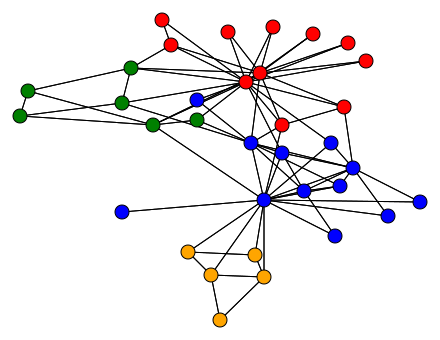

In [137]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [138]:
# How many clusters for depth 2, " For values of n_clusters equal to 3 or 4 we find the same clustering as above so I chose n_clusters=5 "
depth_2_labels = cut_straight(dendrogram, n_clusters=5)
n_clusters_depth_2 = len(set(depth_2_labels))
print("Number of clusters at depth 2:", n_clusters_depth_2)


Number of clusters at depth 2: 9


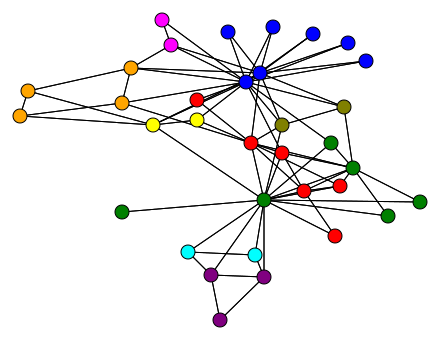

In [139]:
image = visualize_graph(adjacency, position, labels=depth_2_labels)
SVG(image)

## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. Compare this clustering to the ground-truth labels.
* Display the graph with the top-4 clusters. Compare this clustering with that given by Louvain (depth 1).
* Display the corresponding aggregate dendrogram (check the parameters of the function ``cut_straight``).

In [140]:
paris = Paris()

In [141]:
dendrogram = paris.fit_predict(adjacency)

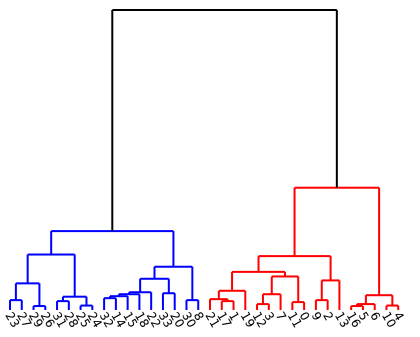

In [142]:
image = visualize_dendrogram(dendrogram, names=np.arange(34))
SVG(image)

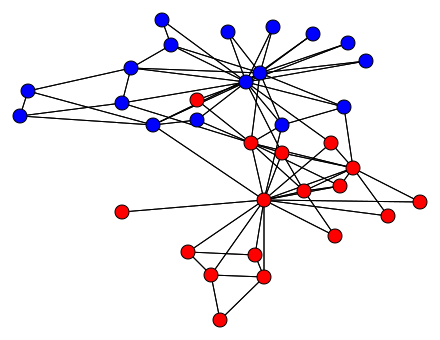

In [143]:
labels_2 = cut_straight(dendrogram, n_clusters=2)
SVG(visualize_graph(adjacency, position, labels=labels_2))


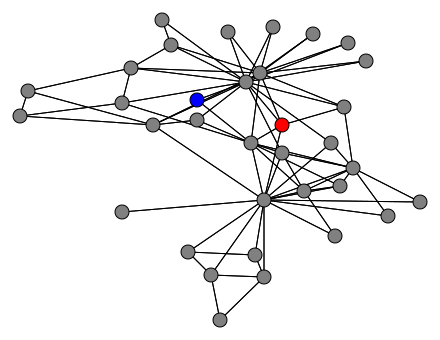

In [144]:
# Misclassified Nodes
misclassified_nodes = np.flatnonzero(labels_2 != labels_true)
image = visualize_graph(
    adjacency, position, labels={i: labels[i] for i in misclassified_nodes}
)
SVG(image)

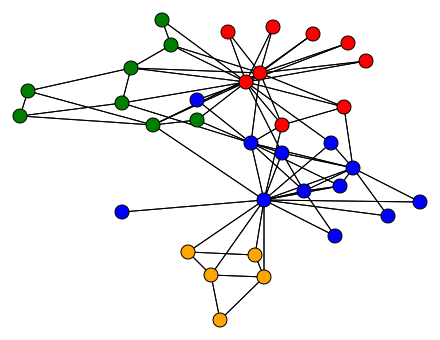

In [145]:
# Displaying graph with top-4 Clusters
labels_paris_4 = cut_straight(dendrogram, 4)
image = visualize_graph(adjacency, position, labels=labels_paris_4)
SVG(image)

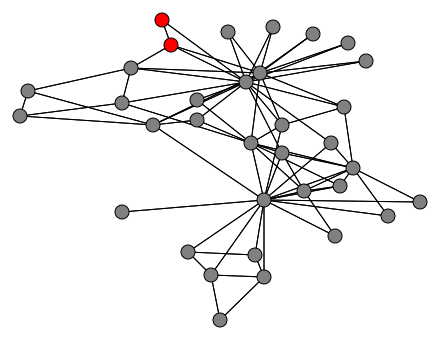

In [146]:
# Misclassified Nodes
misclassified_nodes = np.flatnonzero(labels != labels_paris_4) # Labels here are the labels of the first clustering of Louvain
image = visualize_graph(
    adjacency, position, labels={i: labels[i] for i in misclassified_nodes}
)
SVG(image)

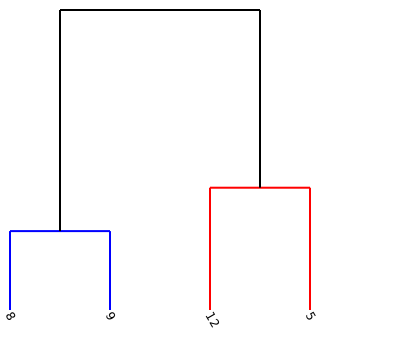

In [147]:
labels_agg, dendrogram_aggregate = cut_straight(dendrogram, 4, return_dendrogram=True)
_, counts = np.unique(labels_agg, return_counts=True)
image = visualize_dendrogram(dendrogram_aggregate, names=counts)
SVG(image)

## Openflights


In [148]:
dataset = openflights

In [149]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

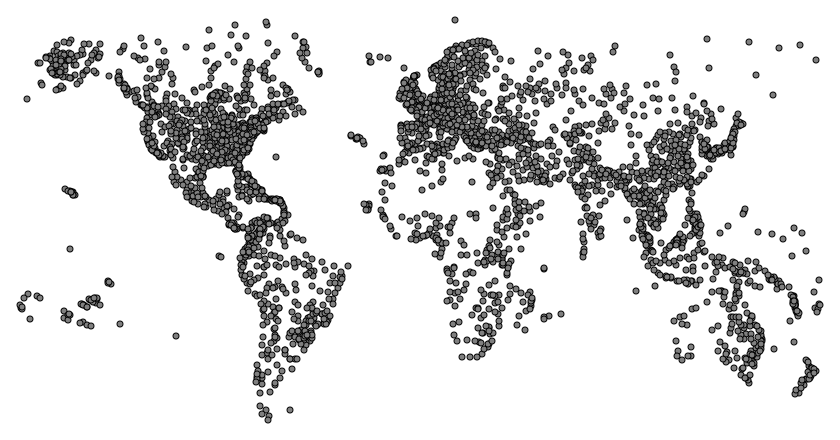

In [150]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.<br>
Refer to the [tutorial on Louvain](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html) to display the aggregate graph.
* Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>Check the parameters of the function ``visualize_dendrogram`` for better visualization.

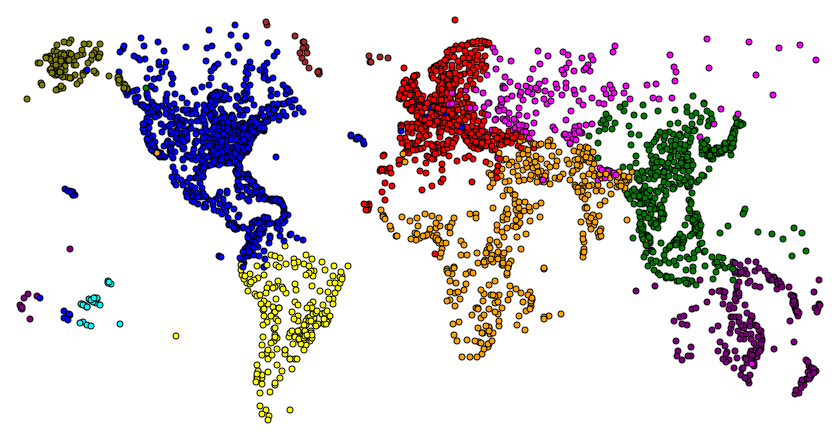

In [151]:
# Displaying top-10 clusters found by Paris
paris = Paris()
dendrogram = paris.fit_predict(adjacency)
labels = cut_straight(dendrogram, 10)
image = visualize_graph(
    adjacency,
    position,
    width=800,
    height=400,
    node_size=3,
    labels=labels,
    display_edges=False,
)
SVG(image)

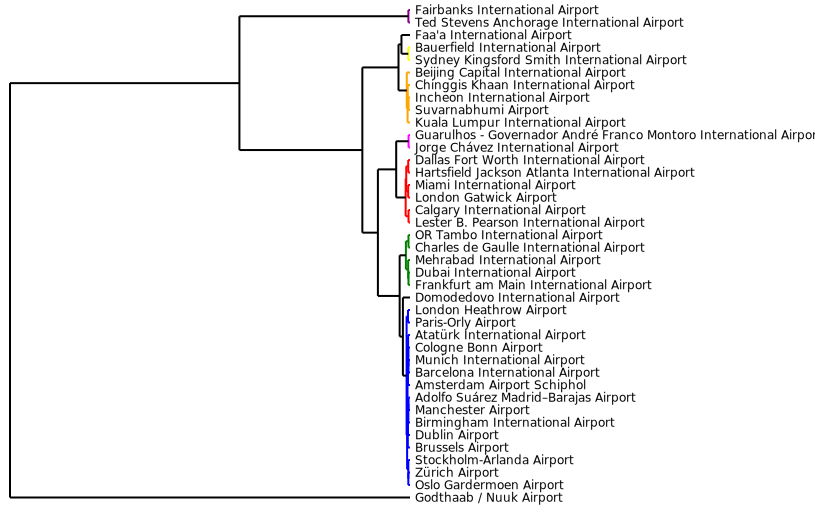

In [152]:
# Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport (in traffic) of each cluster.
labels_40, dendrogram_agg = cut_straight(dendrogram, n_clusters=40, return_dendrogram=True)
clusters = np.unique(labels_40)
airport_degrees = adjacency @ np.ones(adjacency.shape[0])
main_airports = []
for cluster_id in clusters:
    cluster_indices = np.where(labels_40 == cluster_id)[0]
    most_connected = cluster_indices[np.argmax(airport_degrees[cluster_indices])]
    main_airports.append(most_connected)


image = visualize_dendrogram(
    dendrogram_agg,
    names=[names[i] for i in main_airports],
    rotate=True,
    n_clusters=10,
    height=500
)

SVG(image)


## 2. Directed graphs

## Wikipedia Vitals

In [153]:
dataset = wikivitals

In [154]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles (in terms of Personalized PageRank) of each of the top-40 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters, with the name of the top article of each cluster. Comment the results.


In [155]:
# Clustering the graph by Paris algorithm
paris = Paris()
dendrogram = paris.fit_predict(adjacency)

In [156]:
# Top 40 clusters from the Paris algorithm
labels, dendrogram_agg = cut_straight(dendrogram, n_clusters=40, return_dendrogram=True)

# PPR
pagerank = PageRank()
top_pages = []

print("Top pages par cluster :")
for cluster in np.unique(labels):
    scores = pagerank.fit_predict(adjacency, weights=(labels == cluster))
    scores *= (labels == cluster)  # ignorer les scores hors cluster
    top_5 = np.argsort(-scores)[:5]  # top-5 articles
    top_pages.append(top_5[0])

    print(f"\nCluster {cluster}:")
    for i, idx in enumerate(top_5, 1):
        print(f"{i}. {names[idx]} (score = {scores[idx]:.4f})")


Top pages par cluster :

Cluster 0:
1. The New York Times (score = 0.0037)
2. BBC (score = 0.0018)
3. Time (magazine) (score = 0.0017)
4. Encyclopædia Britannica (score = 0.0014)
5. Jazz (score = 0.0014)

Cluster 1:
1. Taxonomy (biology) (score = 0.0046)
2. Animal (score = 0.0045)
3. Chordate (score = 0.0031)
4. Permian (score = 0.0027)
5. Jurassic (score = 0.0026)

Cluster 2:
1. Plant (score = 0.0029)
2. Flowering plant (score = 0.0023)
3. Protein (score = 0.0023)
4. Sugar (score = 0.0018)
5. Gloss (optics) (score = 0.0017)

Cluster 3:
1. World Health Organization (score = 0.0019)
2. Medical diagnosis (score = 0.0016)
3. Bacteria (score = 0.0016)
4. Cancer (score = 0.0014)
5. Immune system (score = 0.0014)

Cluster 4:
1. Water (score = 0.0015)
2. Pressure (score = 0.0014)
3. Plate tectonics (score = 0.0014)
4. Glacier (score = 0.0013)
5. Erosion (score = 0.0013)

Cluster 5:
1. Albert Einstein (score = 0.0027)
2. Physics (score = 0.0026)
3. International System of Units (score = 0.0025

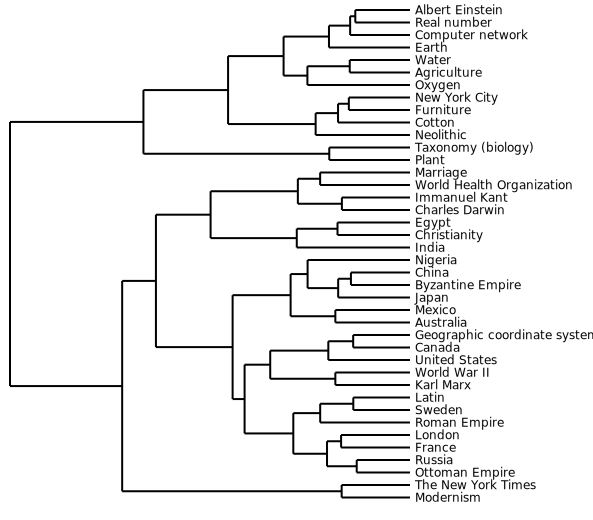

In [157]:
image = visualize_dendrogram(
    dendrogram_agg,
    names=[names[i] for i in top_pages],
    rotate=True,
    n_clusters=40,
    height=500
)

SVG(image)

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.
* Do the same with another article of your choice.

In [158]:
def get_nested_clusters(dendrogram: np.ndarray, node: int):
    '''Get the nested clusters of a node, following the path from the corresponding leaf to the root in the dendrogram.

    Parameters
    ----------
    dendrogram:
        Dendrogram
    node:
        Target node

    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes
        (the k-th nested cluster is the concatenation of the first k lists).

    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_nested_clusters(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1

    cluster = {i: [i] for i in range(n)}
    nested_clusters = [[node]]
    cluster_index = node


    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        new_cluster = cluster[i] + cluster[j]

        cluster[n + t] = new_cluster  # assign new cluster ID (n + t)

        if cluster_index in [i, j] or cluster_index in cluster[i] or cluster_index in cluster[j]:
            nested_clusters.append(new_cluster)
            cluster_index = n + t  # update to current merged cluster

    return nested_clusters

In [159]:
idx_riverboat = np.where(names == "Riverboat")[0][0]
print(idx_riverboat)

7696


In [160]:
nested_clusters = get_nested_clusters(dendrogram, idx_riverboat)
print(len(nested_clusters))

21


In [161]:
# Initialiser PPR pour calculer les scores
pagerank = PageRank()

print(f"Analyse des clusters imbriqués pour l'article 'Riverboat' (index {idx_riverboat}) :\n")


for depth, cluster_nodes in enumerate(nested_clusters, start=1):
    labels = np.full(adjacency.shape[0], -1)
    labels[cluster_nodes] = 0  # cluster cible = 0, les autres = -1 (hors cluster)

    scores = pagerank.fit_predict(adjacency, weights=(labels == 0))
    scores *= (labels == 0)  # garder uniquement les scores dans le cluster

    cluster_nodes = np.array(cluster_nodes)
    scores_cluster = scores[cluster_nodes]

    top_5_local = cluster_nodes[np.argsort(-scores_cluster)[:5]]

    print(f"\nProfondeur {depth} - Taille du cluster : {len(cluster_nodes)}")
    for rank, idx in enumerate(top_5_local, start=1):
        print(f"{rank}. {names[idx]} (score={scores[idx]:.4f})")

Analyse des clusters imbriqués pour l'article 'Riverboat' (index 7696) :


Profondeur 1 - Taille du cluster : 1
1. Riverboat (score=0.1513)

Profondeur 2 - Taille du cluster : 2
1. Tanker (ship) (score=0.0790)
2. Riverboat (score=0.0786)

Profondeur 3 - Taille du cluster : 4
1. Tanker (ship) (score=0.0430)
2. Riverboat (score=0.0428)
3. Passenger ship (score=0.0424)
4. Merchant ship (score=0.0397)

Profondeur 4 - Taille du cluster : 5
1. Tanker (ship) (score=0.0357)
2. Riverboat (score=0.0355)
3. Passenger ship (score=0.0352)
4. Merchant ship (score=0.0319)
5. Freight transport (score=0.0311)

Profondeur 5 - Taille du cluster : 6
1. Tanker (ship) (score=0.0304)
2. Riverboat (score=0.0302)
3. Passenger ship (score=0.0300)
4. Cargo ship (score=0.0278)
5. Merchant ship (score=0.0271)

Profondeur 6 - Taille du cluster : 7
1. Fishing vessel (score=0.0273)
2. Tanker (ship) (score=0.0264)
3. Riverboat (score=0.0263)
4. Passenger ship (score=0.0260)
5. Cargo ship (score=0.0242)

Profondeur 7 -

In [163]:
# Doing the same for another article of my choice
idx_goat = np.where(names == "Lionel Messi")[0][0]
nested_clusters = get_nested_clusters(dendrogram, idx_goat)
print(f"Analyse des clusters imbriqués pour l'article 'Lionel Messi' :\n")


for depth, cluster_nodes in enumerate(nested_clusters, start=1):
    labels = np.full(adjacency.shape[0], -1)
    labels[cluster_nodes] = 0  # cluster cible = 0, les autres = -1 (hors cluster)

    scores = pagerank.fit_predict(adjacency, weights=(labels == 0))
    scores *= (labels == 0)  # garder uniquement les scores dans le cluster

    cluster_nodes = np.array(cluster_nodes)
    scores_cluster = scores[cluster_nodes]

    top_5_local = cluster_nodes[np.argsort(-scores_cluster)[:5]]

    print(f"\nProfondeur {depth} - Taille du cluster : {len(cluster_nodes)}")
    for rank, idx in enumerate(top_5_local, start=1):
        print(f"{rank}. {names[idx]} (score={scores[idx]:.4f})")

Analyse des clusters imbriqués pour l'article 'Lionel Messi' :


Profondeur 1 - Taille du cluster : 1
1. Lionel Messi (score=0.1511)

Profondeur 2 - Taille du cluster : 2
1. Lionel Messi (score=0.0778)
2. La Liga (score=0.0771)

Profondeur 3 - Taille du cluster : 3
1. Cristiano Ronaldo (score=0.0534)
2. Lionel Messi (score=0.0528)
3. La Liga (score=0.0522)

Profondeur 4 - Taille du cluster : 11
1. Johan Cruyff (score=0.0170)
2. Alfredo Di Stéfano (score=0.0167)
3. Diego Maradona (score=0.0167)
4. Ferenc Puskás (score=0.0167)
5. Zinedine Zidane (score=0.0166)

Profondeur 5 - Taille du cluster : 12
1. Johan Cruyff (score=0.0157)
2. Alfredo Di Stéfano (score=0.0155)
3. Diego Maradona (score=0.0155)
4. Ferenc Puskás (score=0.0155)
5. Zinedine Zidane (score=0.0154)

Profondeur 6 - Taille du cluster : 13
1. Johan Cruyff (score=0.0147)
2. Alfredo Di Stéfano (score=0.0145)
3. Diego Maradona (score=0.0145)
4. Ferenc Puskás (score=0.0145)
5. Zinedine Zidane (score=0.0143)

Profondeur 7 - Taille 